+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [4]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Songti SC']

In [5]:
#数据的读入
data_w = pd.read_excel('/Users/jiahewanshixing/Desktop/国外疫情.xlsx',index_col=0,names=['日期','新增确诊', '新增治愈', '新增死亡', '累计确诊', '累计死亡'])
# data_w.plot()
data_w

,新增确诊,新增治愈,新增死亡,累计确诊,累计死亡
日期,,,,,
2020-03-15,10955,8925,2531,87464,3289
2020-03-16,13874,9937,3388,101338,6677
2020-03-17,11487,12390,4195,112825,10872
2020-03-18,15084,14700,4576,127909,15448
2020-03-19,16498,17179,5536,144407,20984
2020-03-20,24121,19031,6587,168528,27571
2020-03-21,31884,19914,7923,200412,35494
2020-03-22,25987,25457,9517,226399,45011
2020-03-23,40685,26284,11234,267084,56245


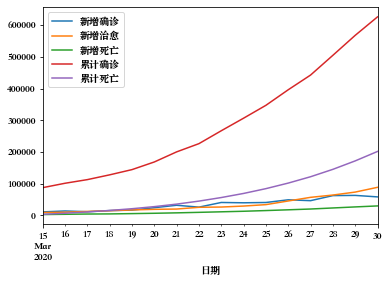

In [6]:
#数据的可视化
data_w.plot()

#可以看出世界的累计确诊人数呈指数形式增长

In [7]:
#下面对数据进行时间序列分析及预测

#数据的稳定性检验
from statsmodels.tsa.stattools import adfuller as ADF
print("原始序列的ADF检验为：",ADF(data_w['累计确诊']))
# 由于p值显著大于0.5，所以为非平稳序列

原始序列的ADF检验为： (0.9032560680936942, 0.9931326721104227, 6, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, 178.99144377884468)


In [6]:
#做时间的差分
D_data = data_w['累计确诊'].diff().dropna()
#进行平稳性检验
print("差分后的序列的ADF为：",ADF(D_data))
#再次进行差分
D2_data = D_data.diff().dropna()
print("二次差分后的ADF：",ADF(D2_data))
#再次进行差分
D3_data = D2_data.diff().dropna()
print("第三次差分的ADF：",ADF(D3_data))
#第三次的差分完成了检验

差分后的序列的ADF为： (0.506885191590546, 0.9850808705741169, 4, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 180.66071991398456)
二次差分后的ADF： (-1.965867537394836, 0.30173653327452093, 5, 8, {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}, 155.01136462656595)
第三次差分的ADF： (-4.170110124584131, 0.0007400129143306726, 3, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, 163.66871028982007)


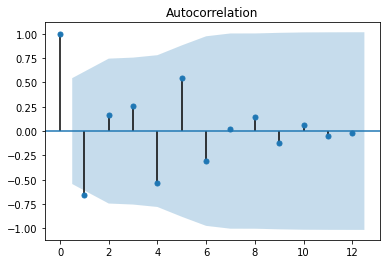

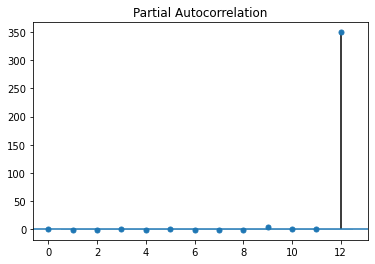

In [7]:
#对第三次差分后的进行自相关性检验
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(D3_data).show()
plot_pacf(D3_data).show()

#由于检验不易看出阶数，我们采用另外的方法。

In [8]:
#通过AIC等订阶
import statsmodels.api as sm
#AIC
AIC = sm.tsa.arma_order_select_ic(D3_data,\
        max_ar=6,max_ma=4,ic='aic')['aic_min_order']
#BIC
BIC = sm.tsa.arma_order_select_ic(D3_data,max_ar=6,\
           max_ma=4,ic='bic')['bic_min_order']

#HQIC
HQIC = sm.tsa.arma_order_select_ic(D3_data,max_ar=6,\
             max_ma=4,ic='hqic')['hqic_min_order']
print('the AIC is{},\nthe BIC is{}\n the HQIC is{}'.format(AIC,BIC,HQIC))

In [9]:
#判断最佳模型
import statsmodels.api as sm
arma_03 = sm.tsa.ARMA(D3_data,(0,3)).fit()
print(arma_03.aic,arma_03.bic,arma_03.hqic)
#另外两种报错

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


268.0266929987819 270.8514397860896 267.44608034626305


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


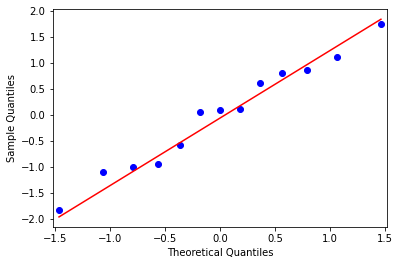

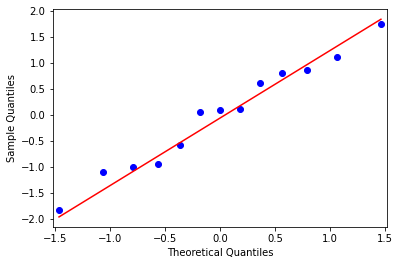

In [10]:
#模型检验
from statsmodels.api import qqplot
resid = arma_03.resid
qqplot(resid, line='q',fit=True)
#通过检验

In [11]:
predict = arma_03.predict()
predict

2020-03-18       43.591590
2020-03-19    -4466.301672
2020-03-20     -887.448013
2020-03-21    -9821.283850
2020-03-22   -11427.628444
2020-03-23    14893.383579
2020-03-24   -18219.967142
2020-03-25     4499.615920
2020-03-26     8151.775513
2020-03-27    -4913.199944
2020-03-28    16324.919059
2020-03-29   -20152.548430
2020-03-30    -2472.956142
Freq: D, dtype: float64

In [12]:
# 模型的检验

#第一次还原
diff_shift_ts = D2_data.shift(1)
diff_recover_1 = predict.add(diff_shift_ts)
#第二次还原
rol_shift_ts = D_data.shift(1)
diff_recover_2 = diff_recover_1.add(rol_shift_ts)
#第三次还原
rol2_shift = data_w['累计确诊'].shift(1)
diff_recover_3 = diff_recover_2.add(rol2_shift)
diff_recover_3

2020-03-15              NaN
2020-03-16              NaN
2020-03-17              NaN
2020-03-18    121968.591590
2020-03-19    142123.698328
2020-03-20    161431.551987
2020-03-21    190450.716150
2020-03-22    228631.371556
2020-03-23    261382.383579
2020-03-24    304247.032858
2020-03-25    349941.615920
2020-03-26    397068.775513
2020-03-27    449169.800056
2020-03-28    502801.919059
2020-03-29    563415.451570
2020-03-30    629475.043858
dtype: float64

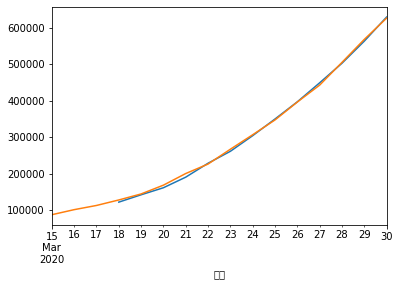

In [22]:
#预测模型和实际数据的拟合
diff_recover_3.plot()
data_w['累计确诊'].plot()

In [13]:
#3月31日的预测：
pr = arma_03.predict('2020-03-31')
pr +=D2_data[-1]
pr +=D_data[-1]
pr +=data_w['累计确诊'][-1]
pr

2020-03-31    699622.336602
Freq: D, dtype: float64